# ***Instagram User Behavior Analysis for Fake and Real Account***
**Author: Shifa Naaz**

<div align="center" style="background: purple; color: white; padding: 10px; border-top-left-radius: 20px; border-top-right-radius: 0px; border-bottom-left-radius: 0px; border-bottom-right-radius: 20px;">
  <h1 style="font-size: 40px; font-weight: bold; font-family: 'Times New Roman'; margin: 0; padding: 0;">1.Problem Statment</h1>
</div>

<right>
<h1 style="background-color:Lavender; color:black; font-size:20px; font-family:Roman; border-radius: 10px;"> This project focuses on analyzing user behavior on Instagram to gain insights into user engagement, preferences, and overall experience. Key areas include user engagement metrics, content analysis, demographics, follower growth/churn, influencer analysis, brand advocacy, story engagement, page factors, and user journey analysis. Privacy and ethical considerations align with Instagram's terms of service and data usage policies.

<div align="center" style="background: purple; color: white; padding: 10px; border-top-left-radius: 20px; border-top-right-radius: 0px; border-bottom-left-radius: 0px; border-bottom-right-radius: 20px;">
  <h1 style="font-size: 40px; font-weight: bold; font-family: 'Times New Roman'; margin: 0; padding: 0;">2.Importing Libraries</h1>
</div>




In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<div align="center" style="background: purple; color: white; padding: 10px; border-top-left-radius: 20px; border-top-right-radius: 0px; border-bottom-left-radius: 0px; border-bottom-right-radius: 20px;">
  <h1 style="font-size: 40px; font-weight: bold; font-family: 'Times New Roman'; margin: 0; padding: 0;">3.Data Importing</h1>
</div>


In [2]:
df = pd.read_csv('/kaggle/input/instagram-fake-and-real-accounts-dataset/final-v1.csv')

<div align="center" style="background: purple; color: white; padding: 10px; border-top-left-radius: 20px; border-top-right-radius: 0px; border-bottom-left-radius: 0px; border-bottom-right-radius: 20px;">
  <h1 style="font-size: 40px; font-weight: bold; font-family: 'Times New Roman'; margin: 0; padding: 0;">4.Data Reading and Cleaning</h1>
</div>

# Data Reading and Cleaning


In [3]:
df.head(5)

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
0,0.001,0.257,13,1,1,13,0,0,0,0,0,0,1
1,0.000,0.958,9,1,0,0,0,1,0,0,0,0,1
2,0.000,0.253,12,0,0,0,0,0,0,0,0,0,1
3,0.000,0.977,10,1,0,0,0,0,0,0,0,0,1
4,0.000,0.321,11,0,0,11,1,0,0,0,0,0,1


In [4]:
df.tail(5)

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
780,0.0,0.020,9,0,0,14,1,0,0,0,0,0,0
781,0.0,0.081,18,1,0,15,1,0,0,0,0,0,0
782,0.0,0.115,9,0,0,8,1,0,0,0,0,0,0
783,0.0,0.049,12,0,0,28,1,0,0,0,0,0,0
784,0.0,0.096,11,0,0,0,1,0,0,0,0,0,0


In [5]:
df.shape

(785, 13)

In [6]:
df.columns

Index(['edge_followed_by', 'edge_follow', 'username_length',
       'username_has_number', 'full_name_has_number', 'full_name_length',
       'is_private', 'is_joined_recently', 'has_channel',
       'is_business_account', 'has_guides', 'has_external_url', 'is_fake'],
      dtype='object')

In [7]:
#Data reading, checking dimensions and information of the data
print(df)
print('dimensions:')
print(df.shape)
print('Information:')
df.info()

     edge_followed_by  edge_follow  username_length  username_has_number  \
0               0.001        0.257               13                    1   
1               0.000        0.958                9                    1   
2               0.000        0.253               12                    0   
3               0.000        0.977               10                    1   
4               0.000        0.321               11                    0   
..                ...          ...              ...                  ...   
780             0.000        0.020                9                    0   
781             0.000        0.081               18                    1   
782             0.000        0.115                9                    0   
783             0.000        0.049               12                    0   
784             0.000        0.096               11                    0   

     full_name_has_number  full_name_length  is_private  is_joined_recently  \
0       

In [8]:
print(df.apply(lambda col: col.unique())) 

edge_followed_by        [0.001, 0.0, 0.002, 0.005, 0.008, 0.003, 0.006...
edge_follow             [0.257, 0.958, 0.253, 0.977, 0.321, 0.917, 0.0...
username_length         [13, 9, 12, 10, 11, 15, 7, 8, 17, 14, 20, 18, ...
username_has_number                                                [1, 0]
full_name_has_number                                               [1, 0]
full_name_length        [13, 0, 11, 9, 4, 6, 1, 16, 7, 5, 15, 2, 3, 12...
is_private                                                         [0, 1]
is_joined_recently                                                 [0, 1]
has_channel                                                           [0]
is_business_account                                                [0, 1]
has_guides                                                         [0, 1]
has_external_url                                                   [0, 1]
is_fake                                                            [1, 0]
dtype: object


In [9]:
df.nunique()

edge_followed_by         22
edge_follow             506
username_length          21
username_has_number       2
full_name_has_number      2
full_name_length         30
is_private                2
is_joined_recently        2
has_channel               1
is_business_account       2
has_guides                2
has_external_url          2
is_fake                   2
dtype: int64

In [10]:
df.corr()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
edge_followed_by,1.000000,-0.054259,-0.033704,-0.071313,-0.019349,0.116751,-0.024593,-0.044327,NaN,0.036585,0.002749,0.180392,-0.136808
edge_follow,-0.054259,1.000000,-0.112940,0.160248,0.104735,-0.089677,-0.072626,-0.133170,NaN,-0.132422,0.002723,-0.108482,0.272649
username_length,-0.033704,-0.112940,1.000000,-0.160610,-0.021410,0.277052,0.117582,-0.099414,NaN,0.132683,-0.006861,0.112466,-0.151752
username_has_number,-0.071313,0.160248,-0.160610,1.000000,0.217852,-0.246511,-0.154072,0.127046,NaN,-0.278637,-0.048097,-0.237466,0.370164
full_name_has_number,-0.019349,0.104735,-0.021410,0.217852,1.000000,0.250275,-0.072366,0.066941,NaN,-0.083482,-0.012527,-0.039926,0.128588
full_name_length,0.116751,-0.089677,0.277052,-0.246511,0.250275,1.000000,0.064409,-0.216572,NaN,0.323137,0.122848,0.309318,-0.350433
is_private,-0.024593,-0.072626,0.117582,-0.154072,-0.072366,0.064409,1.000000,-0.071448,NaN,-0.134444,-0.016999,-0.041399,-0.262292
is_joined_recently,-0.044327,-0.133170,-0.099414,0.127046,0.066941,-0.216572,-0.071448,1.000000,NaN,-0.172122,-0.026889,-0.150433,0.276012
has_channel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_business_account,0.036585,-0.132422,0.132683,-0.278637,-0.083482,0.323137,-0.134444,-0.172122,NaN,1.000000,0.126443,0.289467,-0.318395


In [11]:
#Cheking for missing
df.isnull().sum()

edge_followed_by        0
edge_follow             0
username_length         0
username_has_number     0
full_name_has_number    0
full_name_length        0
is_private              0
is_joined_recently      0
has_channel             0
is_business_account     0
has_guides              0
has_external_url        0
is_fake                 0
dtype: int64

In [12]:
#Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
edge_followed_by,785.0,0.002223,0.036105,0.0,0.000,0.000,0.000,1.0
edge_follow,785.0,0.401606,0.293845,0.0,0.135,0.336,0.623,1.0
username_length,785.0,11.630573,3.284329,5.0,9.000,11.000,13.000,26.0
username_has_number,785.0,0.644586,0.478944,0.0,0.000,1.000,1.000,1.0
full_name_has_number,785.0,0.109554,0.312532,0.0,0.000,0.000,0.000,1.0
full_name_length,785.0,6.129936,6.943903,0.0,0.000,5.000,11.000,30.0
is_private,785.0,0.184713,0.388312,0.0,0.000,0.000,0.000,1.0
is_joined_recently,785.0,0.361783,0.480823,0.0,0.000,0.000,1.000,1.0
has_channel,785.0,0.000000,0.000000,0.0,0.000,0.000,0.000,0.0
is_business_account,785.0,0.073885,0.261751,0.0,0.000,0.000,0.000,1.0


In [13]:
df.drop(["has_guides"],axis=1,inplace=True)
df.drop(["edge_follow"],axis=1,inplace=True)
df.drop(["has_channel"],axis=1,inplace=True)
df.drop(["edge_followed_by"],axis=1,inplace=True)

In [14]:
df.head(5)

,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,is_business_account,has_external_url,is_fake
0,13,1,1,13,0,0,0,0,1
1,9,1,0,0,0,1,0,0,1
2,12,0,0,0,0,0,0,0,1
3,10,1,0,0,0,0,0,0,1
4,11,0,0,11,1,0,0,0,1



<div align="center" style="background: purple; color: white; padding: 10px; border-top-left-radius: 20px; border-top-right-radius: 0px; border-bottom-left-radius: 0px; border-bottom-right-radius: 20px;">
  <h1 style="font-size: 40px; font-weight: bold; font-family: 'Times New Roman'; margin: 0; padding: 0;">5.Data Visualization</h1>
</div>

# Data Visualization

In [15]:
account = df.groupby("is_business_account")
account = account.size()
account

is_business_account
0    727
1     58
dtype: int64

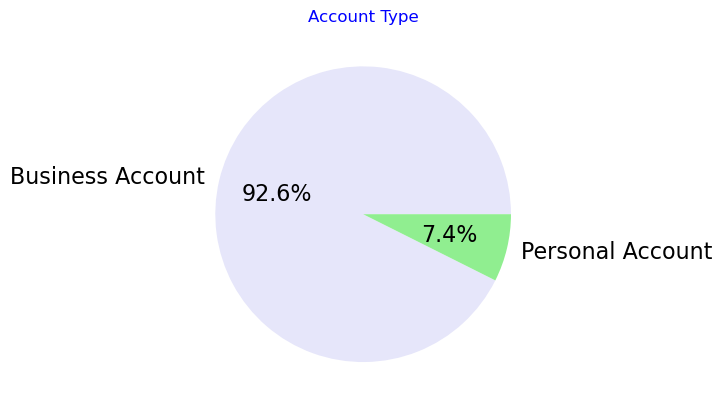

In [16]:
plt.pie(account.values , labels = ("Business Account", "Personal Account"), autopct='%1.1f%%',colors=['Lavender','lightgreen'], radius = 1, textprops = {"fontsize" : 16}) 
plt.title("Account Type", c="Blue")
plt.show()

In [17]:
account1 = df.groupby("is_private")
account1 = account1.size()
account1

is_private
0    640
1    145
dtype: int64

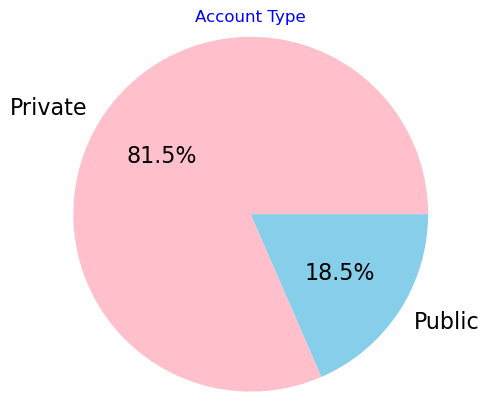

In [18]:
plt.pie(account1.values , labels = ("Private", "Public"), autopct='%1.1f%%', colors=['pink','skyblue'], radius = 1.2, textprops = {"fontsize" : 16}) 
plt.title("Account Type", c="Blue")
plt.show()

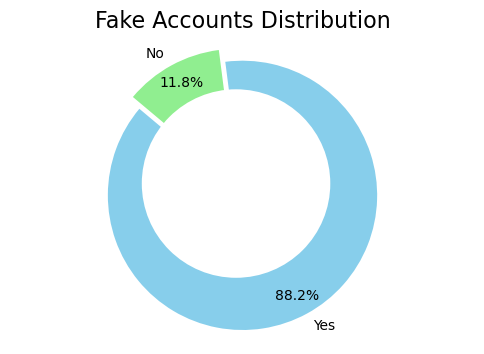

In [19]:
fake_account_counts = df['is_fake'].value_counts()
labels = ['Yes', 'No']
colors = ['Skyblue', 'lightgreen']
explode = (0.1, 0)  # Create a "donut hole" effect by exploding the first slice

# Create a pie chart
plt.figure(figsize=(6, 4))
plt.pie(fake_account_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=explode)
plt.title('Fake Accounts Distribution', fontsize=16)

# Draw a circle in the center to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

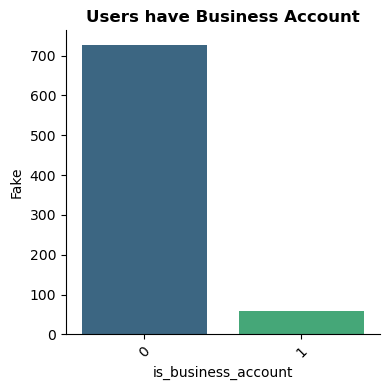

In [20]:
def barplot(column, horizontal):
    plt.figure(figsize=(4, 4))
    sns.countplot(x=column, data=df, palette='viridis')
    plt.xlabel(column)
    plt.ylabel("Fake")
    plt.title(f"Users have Business Account", fontweight='bold')
    plt.xticks(rotation=45)
    sns.despine()
    plt.tight_layout()
    plt.show()

barplot('is_business_account', True)

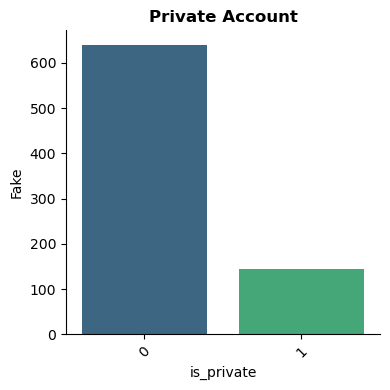

In [21]:
def barplot(column, horizontal):
    plt.figure(figsize=(4, 4))
    sns.countplot(x=column, data=df, palette='viridis')
    plt.xlabel(column)
    plt.ylabel("Fake")
    plt.title(f"Private Account", fontweight='bold')
    plt.xticks(rotation=45)
    sns.despine()
    plt.tight_layout()
    plt.show()

barplot('is_private', True)

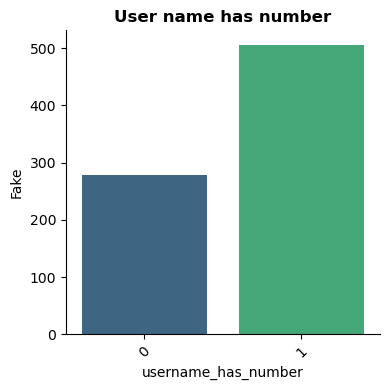

In [22]:
def barplot(column, horizontal):
    plt.figure(figsize=(4, 4))
    sns.countplot(x=column, data=df, palette='viridis')
    plt.xlabel(column)
    plt.ylabel("Fake")
    plt.title(f"User name has number", fontweight='bold')
    plt.xticks(rotation=45)
    sns.despine()
    plt.tight_layout()
    plt.show()

barplot('username_has_number', True)

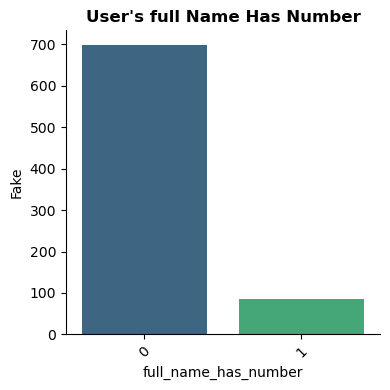

In [23]:
def barplot(column, horizontal):
    plt.figure(figsize=(4, 4))
    sns.countplot(x=column, data=df, palette='viridis')
    plt.xlabel(column)
    plt.ylabel("Fake")
    plt.title(f"User's full Name Has Number", fontweight='bold')
    plt.xticks(rotation=45)
    sns.despine()
    plt.tight_layout()
    plt.show()

barplot('full_name_has_number', True)

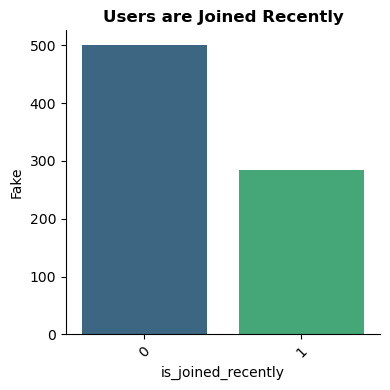

In [24]:
def barplot(column, horizontal):
    plt.figure(figsize=(4, 4))
    sns.countplot(x=column, data=df, palette='viridis')
    plt.xlabel(column)
    plt.ylabel("Fake")
    plt.title(f"Users are Joined Recently", fontweight='bold')
    plt.xticks(rotation=45)
    sns.despine()
    plt.tight_layout()
    plt.show()

barplot('is_joined_recently', True)

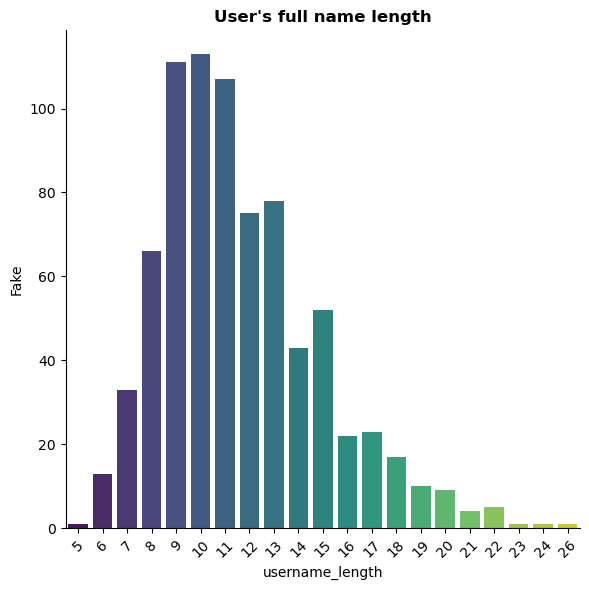

In [25]:
def barplot(column, horizontal):
    plt.figure(figsize=(6, 6))
    sns.countplot(x=column, data=df, palette='viridis')
    plt.xlabel(column)
    plt.ylabel("Fake")
    plt.title(f"User's full name length", fontweight='bold')
    plt.xticks(rotation=45)
    sns.despine()
    plt.tight_layout()
    plt.show()

barplot('username_length', True)


<div align="center" style="background: purple; color: white; padding: 10px; border-top-left-radius: 20px; border-top-right-radius: 0px; border-bottom-left-radius: 0px; border-bottom-right-radius: 20px;">
  <h1 style="font-size: 40px; font-weight: bold; font-family: 'Times New Roman'; margin: 0; padding: 0;">6.Insights</h1>
</div>


<right>
<h1 style="background-color:Lavender; color:black; font-size:20px; font-family:Roman; border-radius: 10px;">
    

**1.Business Account:**   Users with non-business accounts tend to have a higher ratio of fake accounts.
    
    
**2.Private/Public Accounts:**   Users with public accounts have a higher ratio of fake accounts.
    
    
**3.Username Has Number:**   Users with names containing numbers have a slightly higher ratio of fake accounts.
    
    
**4.Full Name Characteristics:**   Users with names containing numbers have a slightly higher ratio of fake accounts.
    
    
**5.Recently Joined:**   Users who have not recently joined have higher ratio of fake accounts.
    
    
**6.Username Length:**   Users with shorter usernames tend to have a higher ratio of fake accounts.
    </h1>
</right>



<div align="center" style="background: purple; color: white; padding: 10px; border-top-left-radius: 20px; border-top-right-radius: 0px; border-bottom-left-radius: 0px; border-bottom-right-radius: 20px;">
  <h1 style="font-size: 40px; font-weight: bold; font-family: 'Times New Roman'; margin: 0; padding: 0;">7.Conclusion</h1>
</div>


# Conclusion

<right>
<h1 style="background-color:Lavender; color:black; font-size:20px; font-family:Roman; border-radius: 10px;">
    
This Instagram user behavior analysis project provides valuable insights into account authenticity, user characteristics, and their impact on fake/real accounts. The project helps identify trends and patterns that can assist in understanding user behavior on the platform and contribute to enhancing user experience and privacy.  </h1>
</right>


# Request for Feedback
Thank you for taking the time to review my notebook! I'd greatly appreciate your feedback on the following aspects:

1. Data preprocessing: Did I miss any critical steps?
2. Correct Method: Is the chosen analytical approach appropriate for this problem?
3. Clarity: Is my explanation clear and easy to follow?

Your insights will help me improve this analysis. Feel free to comment directly on the notebook or reach out to me. Thank you!